In [159]:
import warnings
import time

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.preprocessing import normalize
from sklearn.preprocessing import minmax_scale

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabaz_score
from sklearn.metrics import davies_bouldin_score

pd.set_option('precision', 20)
warnings.simplefilter('ignore')

In [160]:
file = open('./health.txt', 'r', encoding = "utf8",)

lines = file.readlines()

file.close()

lines.pop(0)

'id|publish_date|headline_text\n'

In [161]:
dt = pd.read_csv('./bags.csv', header = None)
dt.head()

,0,1,2,3,4,5,6,7,8,9,...,1193,1194,1195,1196,1197,1198,1199,1200,1201,1202
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000000000000000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000000000000000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000000000000000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.55220060585879537918,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000000000000000000,0.0,0.0


In [162]:
data = normalize(dt.values, norm = 'l2')
#data = minmax_scale(dt.values)
#data = dt.values

In [163]:
start = time.time()

k = 500
init = 'k-means++' # k-means++ / random

kmeans = KMeans(n_clusters = k,
                n_init = 1,
                max_iter = 1000,
                init = init,
                algorithm = 'auto',
                precompute_distances = 'auto',
                random_state = 0,
                verbose = False)

kmeans.fit(data)

labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_
loss = kmeans.inertia_

finish = time.time()

calculated_time = (finish - start) / 60

print("Time in Minutes: " + str(calculated_time))

Time in Minutes: 0.7157203475634257


In [164]:
start = time.time()

coefficient = calinski_harabaz_score(data, labels)

print("Coeficiente de Calinski " + str(coefficient))

finish = time.time()

calculated_time = (finish - start) / 60

print("Time in Minutes: " + str(calculated_time))

Coeficiente de Calinski 14.423729221434874
Time in Minutes: 0.006398403644561767


In [165]:
start = time.time()

coefficient = davies_bouldin_score(data, labels)

print("Coeficiente de Davies " + str(coefficient))

finish = time.time()

calculated_time = (finish - start) / 60

print("Time in Minutes: " + str(calculated_time))

Coeficiente de Davies 2.3694898514923217
Time in Minutes: 0.007150665918986002


In [166]:
start = time.time()

coefficient = silhouette_score(data, labels, metric = 'euclidean')

print("Coeficiente de Silhueta " + str(coefficient))

finish = time.time()

calculated_time = (finish - start) / 60

print("Time in Minutes: " + str(calculated_time))

Coeficiente de Silhueta 0.08415288225706478
Time in Minutes: 0.10259766976038615


In [167]:
total_cluster = []

for label in np.unique(labels):
    
    total = len(data[labels == label])
    
    total_cluster.append([label, total])
    
total_cluster = np.array(total_cluster)
total_cluster

array([[   0,   23],
       [   1,    1],
       [   2,   24],
       [   3,   11],
       [   4,   27],
       [   5,   83],
       [   6,    1],
       [   7,    7],
       [   8,    6],
       [   9, 1084],
       [  10,    3],
       [  11,   50],
       [  12,   18],
       [  13,    3],
       [  14,   24],
       [  15,   50],
       [  16,   11],
       [  17,   36],
       [  18,   17],
       [  19,   29],
       [  20,   65],
       [  21,   22],
       [  22,   11],
       [  23,   26],
       [  24,   23],
       [  25,    6],
       [  26,   15],
       [  27,   62],
       [  28,   35],
       [  29,   26],
       [  30,   47],
       [  31,   65],
       [  32,   46],
       [  33,   12],
       [  34,   42],
       [  35,   11],
       [  36,   40],
       [  37,   45],
       [  38,   26],
       [  39,   17],
       [  40,    6],
       [  41,   15],
       [  42,   94],
       [  43,   55],
       [  44,   23],
       [  45,   19],
       [  46,   12],
       [  47,

<BarContainer object of 500 artists>

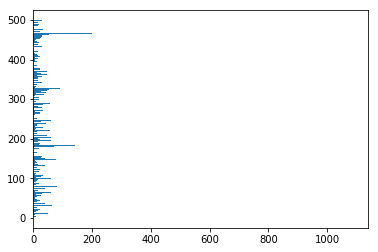

In [168]:
x = total_cluster[:, 0]
y = total_cluster[:, 1]

plt.barh(x, y)

In [170]:
cluster = 0
show = 1000


lines = np.array(lines)

current_data = lines[labels == cluster]

for current_datum in current_data[0 : show]:
    
    datum = current_datum.split("|")[2]
    
    print(datum)

She did the first ever human laser eye surgery

She did the first ever human laser eye surgery

Treat eye #allergy symptoms

Caffeinated chewing gum catches FDA's eye

Women at higher risk for eye disease

More on Anderson's eyeburn: how common is sun eye damage? 

Need some inspiration (or eye candy?) Here's the top 10 fittest men of all time

Eyeliner too close to the eye leads to contamination 

Brewers ban high fives to avoid spreading pink eye 

Man gets #bionic eye, sees family for first time in 10 years

Computer tracks eye movements to detect #concussions

Mobile game may have lasting benefit for ‘lazy’ eye

Indoor tanning can lead to burns, fainting, eye injuries

Drug giant 'blocks' eye treatment

Medieval eye remedy 'kills MRSA'

Tablet video game combats lazy eye

Babies' eye movement autism link

Eye ops were 'painful' and 'rushed'

In pictures: Mali’s motorbiking eye surgeons

Scientists 'print' new eye cells

Poor eye care 'leaving people blind'

Seeing in 3D 'possible w